In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def ideaLPF(height, width, radius=10):  # 理想低通滤波器
    u, v = np.mgrid[-1:1:2.0/height, -1:1:2.0/width]
    Dist = cv.magnitude(u, v)
    D0 = radius/height  # 滤波器半径
    kernel = np.zeros((height, width), np.uint8)
    kernel[Dist <= D0] = 1
    return kernel

In [3]:
img = cv.imread("Fig1101.png", flags=0)  # 读取灰度图像
height, width = img.shape[:2]

In [5]:
# (1) 对图像进行傅里叶变换，并将低频分量移动到中心
imgFloat = img.astype(np.float32)  # 将图像转换成 float32
dft = cv.dft(imgFloat, flags=cv.DFT_COMPLEX_OUTPUT)  # (512,512,2)
dftShift = np.fft.fftshift(dft)  # (512,512,2)

(512, 512) (512, 512, 2) (512, 512, 2)


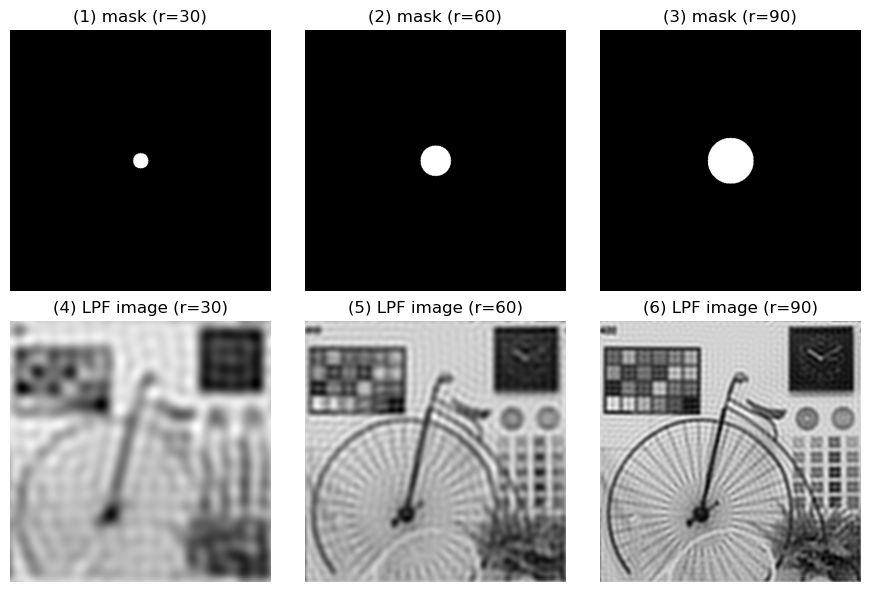

In [7]:
r = [30, 60, 90]  # 低通滤波器半径
plt.figure(figsize=(9, 6))
for i in range(3):
    # (2) 构造低通滤波器
    mask = ideaLPF(height, width, r[i])  # 理想低通滤波器
    maskDual = cv.merge([mask, mask])  # 拼接为2个通道：(h,w,2)
    # maskAmp = cv.magnitude(mask, mask)  # 幅度谱

    # (3) 修改傅里叶变换实现频率域滤波
    dftMask = dftShift * maskDual  # 2个通道分别为实部和虚部

    # (4) 逆中心化后进行傅里叶逆变换
    iShift = np.fft.ifftshift(dftMask)  # 将低频逆转换回图像四角
    iDft = cv.idft(iShift)  # 逆傅里叶变换
    iDftMag = cv.magnitude(iDft[:,:,0], iDft[:,:,1])  # 重建图像
    imgLPF = np.uint8(cv.normalize(iDftMag, None, 0, 255, cv.NORM_MINMAX))

    plt.subplot(2,3,i+1), plt.title("({}) mask (r={})".format(i+1, r[i]))
    plt.axis('off'), plt.imshow(mask, cmap='gray')
    plt.subplot(2,3,i+4), plt.title("({}) LPF image (r={})".format(i+4, r[i]))
    plt.axis('off'), plt.imshow(imgLPF, cmap='gray')

print(img.shape, dft.shape, maskDual.shape)
plt.tight_layout()
plt.show()